In [ ]:
!pip install textblob

from textblob import TextBlob
!python -m textblob.download_corpora

import pandas as pd
import numpy as np
import io
import re


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from google.colab import files
##IMport all CSV files
uploaded = files.upload()

##The data used below was retieved from twitters api
##Due to potential terms and service violation, the following files cannot be released

Saving BoredApeYachtClub_6_2021Tweets.csv to BoredApeYachtClub_6_2021Tweets.csv
Saving BoredApeYachtClub_7_2021Tweets.csv to BoredApeYachtClub_7_2021Tweets.csv


In [ ]:
##Clean the tweet of any links, pictures or extra emojis
def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

##Function to determine the tweets sentiment
def get_tweet_sentiment(tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'


positiveTweets = 0
negativeTweets = 0
neutralTweets=0

totalPositive = 0
totalNegative = 0 
totalNeutral = 0

fileTitles = ["BoredApeYachtClub_6_2021Tweets.csv", "BoredApeYachtClub_7_2021Tweets.csv"]
months = ["June 2021", "July 2021"]
data = {"June 2021" : [0,0,0], "July 2021": [0,0,0]}

k = 0
##For each file
for i in fileTitles:
  
  dfVal = pd.read_csv(io.BytesIO(uploaded[i]))
  dfText = dfVal['text']
  positiveTweets = 0
  negativeTweets = 0
  neutralTweets=0
  
  for i in range(len(dfText)):
    ##Add to sentiment count
    sentiment = get_tweet_sentiment(dfText[i])
    if(sentiment == "positive"):
      positiveTweets += 1
    elif (sentiment == "neutral"):
      neutralTweets += 1
    else:
      negativeTweets += 1

  print("Time Frame - "+str(months[k]))
  
  data[months[k]][0] =negativeTweets
  data[months[k]][1] = positiveTweets
  data[months[k]][2] = neutralTweets
  k+=1
  totalMonthlyTweets = negativeTweets + positiveTweets + neutralTweets
  print("Negative tweets total " +str(negativeTweets) + " percentage " + str(round((negativeTweets / totalMonthlyTweets)* 100 ,0)) + "%")
  print("Positive tweets total " +str(positiveTweets) + " percentage " + str(round((positiveTweets / totalMonthlyTweets)*100,0)) + "%")
  print("Neutral tweets total " +str(neutralTweets) + " percentage " + str(round((neutralTweets / totalMonthlyTweets)*100,0)) + "%")
  print("Total tweets "+str(totalMonthlyTweets))
  totalPositive += positiveTweets
  totalNegative += negativeTweets
  totalNeutral += neutralTweets

totalTweets = totalPositive + totalNeutral + totalNegative
print("Time Frame - 2021 - June  -  2021 - July")
print("Negative tweets total " +str(totalNegative) + " percentage " + str(round((totalNegative / totalTweets)* 100 ,0)) + "%")
print("Positive tweets total " +str(totalPositive) + " percentage " + str(round((totalPositive / totalTweets)*100,0)) + "%")
print("Neutral tweets total " +str(totalNeutral) + " percentage " + str(round((totalNeutral / totalTweets)*100,0)) + "%")
print("Total tweets " +str(totalTweets))


  



Time Frame - June 2021
Negative tweets total 9695 percentage 19.0%
Positive tweets total 24974 percentage 49.0%
Neutral tweets total 16372 percentage 32.0%
Total tweets 51041
Time Frame - July 2021
Negative tweets total 6772 percentage 15.0%
Positive tweets total 25398 percentage 55.0%
Neutral tweets total 14046 percentage 30.0%
Total tweets 46216
Time Frame - 2021 - June  -  2021 - July
Negative tweets total 16467 percentage 17.0%
Positive tweets total 50372 percentage 52.0%
Neutral tweets total 30418 percentage 31.0%
Total tweets 97257


In [ ]:
columns = np.array(['Month',"NegativeTweets", "PositiveTweets", "NeutralTweets"])
dfForWriting = pd.DataFrame(columns = columns)
k = 0
for i in months:
  row = pd.DataFrame([[i,data[i][0],data[i][1],data[i][2]]], columns = columns)
  dfForWriting = pd.concat([dfForWriting, row])

dfForWriting = dfForWriting.set_index("Month")
dfForWriting.head()

dfForWriting.to_csv("BoredApeYachtClubSentiment.csv")

16467 50372 30418


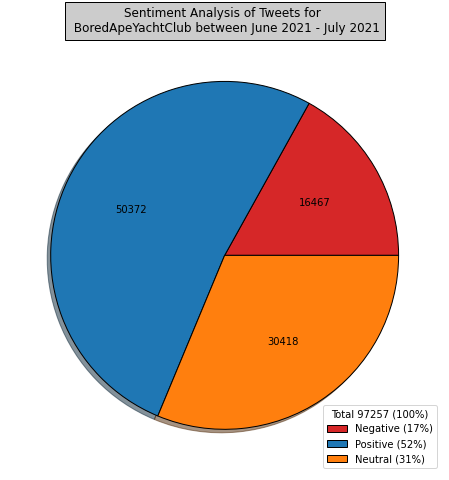

9695 24974 16372


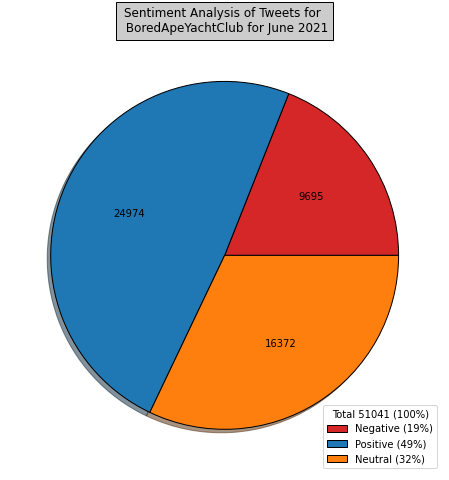

6772 25398 14046


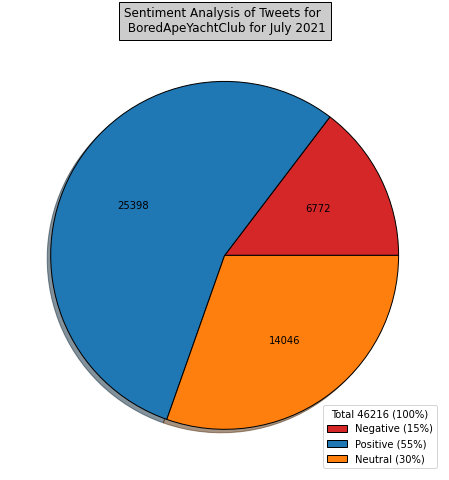

In [ ]:
import matplotlib.pyplot as plt

global valsTotal, valsJune, valsJuly
valsTotal = np.array([totalNegative, totalPositive, totalNeutral])
valsJune = np.array([data['June 2021'][0], data['June 2021'][1], data['June 2021'][2]])
valsJuly = np.array([data['July 2021'][0], data['July 2021'][1], data['July 2021'][2]])
def absoluteValTotal(val):
  a  = np.round(val/100.*valsTotal.sum(), 0)
  return int(a)

def absoluteValJuly(val):
  a  = np.round(val/100.*valsJuly.sum(), 0)
  return int(a)

def absoluteValJune(val):
  a  = np.round(val/100.*valsJune.sum(), 0)
  return int(a)

def createPieChart(negativeTweets, positiveTweets, neutralTweets,  title, function):
  totalTweets= negativeTweets + positiveTweets + neutralTweets
##Produce the Pie Chart for the 3 sentiment totals
  print(negativeTweets, positiveTweets, neutralTweets)
  vals2 =np.array([negativeTweets, positiveTweets, neutralTweets])
  vals = np.array([round((negativeTweets / totalTweets)* 100 ,0),round((positiveTweets / totalTweets)* 100 ,0), round((neutralTweets / totalTweets)* 100 ,0)])
  labels = ['Negative (' + str(int(vals[0])) + "%)", 'Positive ('+str(int(vals[1])) +"%)", "Neutral ("+str(int(vals[2])) + "%)"]
  colors = ["#d62728","#1f77b4", "#ff7f0e"  ]
  explode = (0, 0, 0)

  plt.figure(figsize=(8, 8))
  plt.pie(vals2, explode=explode, colors = colors ,shadow=True, startangle=0,autopct = function, wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True})
  plt.title(title, bbox={'facecolor':'0.8', 'pad':5})
  h = plt.legend(loc="lower right" , labels=labels, title="Total " + str(vals2.sum()) + " (100%)");
  h.FontSize = 6;

  plt.show() 


##Create Total pie chart
title = "Sentiment Analysis of Tweets for \n BoredApeYachtClub between June 2021 - July 2021"
createPieChart(totalNegative, totalPositive, totalNeutral, title, absoluteValTotal)

##June 2021 pie chart
title = "Sentiment Analysis of Tweets for \n BoredApeYachtClub for June 2021"
createPieChart(data['June 2021'][0], data['June 2021'][1], data['June 2021'][2], title,absoluteValJune)

##July 2021 pie chart
title = "Sentiment Analysis of Tweets for \n BoredApeYachtClub for July 2021"
createPieChart(data['July 2021'][0], data['July 2021'][1], data['July 2021'][2], title, absoluteValJuly)